# Brute force, Greedy and FMA algorithms for Partition Problem

In [ ]:
from itertools import chain, combinations

def dp_partition(arr):
    total_sum = sum(arr)

    # Partition not possible if total sum is odd
    if total_sum % 2 != 0:
        return False

    n = len(arr)
    target_sum = total_sum // 2

    # Initialize DP table
    dp = [[False for _ in range(target_sum + 1)] for _ in range(n + 1)]

    # Sum 0 is always possible
    for i in range(n + 1):
        dp[i][0] = True

    # Fill the DP table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            if j < arr[i-1]:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = dp[i-1][j] or dp[i-1][j-arr[i-1]]

    return dp[n][target_sum]

def brute_force_partition(arr):
    total_sum = sum(arr)

    # If total sum is odd, partition is not possible
    if total_sum % 2 != 0:
        return False

    half_sum = total_sum // 2

    # Function to generate all subsets of the set
    def all_subsets(ss):
        return chain(*map(lambda x: combinations(ss, x), range(0, len(ss)+1)))

    # Check if any subset sums up to half of the total sum
    for subset in all_subsets(arr):
        if sum(subset) == half_sum:
            return True
    return False

def greedy_partition(arr):
    # Sort the array in decreasing order
    arr.sort(reverse=True)

    # Initialize sums of two subsets
    subset_sum1 = 0
    subset_sum2 = 0

    # Iterate over sorted elements
    for num in arr:
        # Assign the current element to the subset with the smaller sum
        if subset_sum1 <= subset_sum2:
            subset_sum1 += num
        else:
            subset_sum2 += num

    # Check if the two subsets have the same sum
    return subset_sum1 == subset_sum2

def fma_partition(arr):
    total_sum = sum(arr)

    # If total sum is odd, partition is not possible
    if total_sum % 2 != 0:
        return False

    half_sum = total_sum // 2

    # Sort the array in decreasing order
    arr.sort(reverse=True)

    # Initialize two subsets sums
    subset_sums = [0, 0]

    # Try to fit each element into the first fitting subset
    for num in arr:
        if subset_sums[0] + num <= half_sum:
            subset_sums[0] += num
        elif subset_sums[1] + num <= half_sum:
            subset_sums[1] += num
        else:
            return False  # If the number doesn't fit in either subset

    # Check if the two subsets have equal sum
    return subset_sums[0] == half_sum and subset_sums[1] == half_sum


# Generate test cases

In [ ]:
import random

def generate_test_cases(num_cases, min_length=1, max_length=100, min_value=1, max_value=100):
    """
    Generate a list of test cases for the partition problem.

    :param num_cases: Number of test cases to generate
    :param min_length: Minimum length of each test case
    :param max_length: Maximum length of each test case
    :param min_value: Minimum value of elements in a test case
    :param max_value: Maximum value of elements in a test case
    :return: List of test cases
    """
    test_cases = []
    for _ in range(num_cases):
        length = random.randint(min_length, max_length)
        test_case = [random.randint(min_value, max_value) for _ in range(length)]
        test_cases.append(test_case)
    return test_cases

# Example usage
num_cases = 1000  # Number of test cases to generate
test_cases = generate_test_cases(num_cases, 1, 100)
for i, test_case in enumerate(test_cases[:10]):  # Print first 10 test cases as an example
    print(f"Test case {i+1}: {test_case}")

Test case 1: [71, 93, 16, 70, 45, 86, 65, 54, 90, 18, 58, 42, 45, 52, 60, 68, 86, 38, 53, 34, 92, 78, 47, 38, 89, 11, 68, 24, 1, 45, 72, 99, 7, 63, 25, 81, 22, 62, 5, 18, 5, 32, 62, 62, 19, 35, 93, 83, 86, 5, 31, 2, 30, 27, 41, 52, 16]
Test case 2: [3, 39, 38, 10, 67, 36]
Test case 3: [54, 76, 83, 64, 24, 88, 11, 58, 6, 11, 99, 27, 81]
Test case 4: [84, 63, 60, 31, 4, 54, 17, 40, 79, 99, 76, 83, 84, 36, 87, 22, 4, 53, 64, 79, 70, 21, 49, 31, 80, 65, 26]
Test case 5: [59, 66, 5, 12, 97, 58, 63, 41, 63, 7, 17, 47, 100, 22, 95, 45, 11, 2, 77, 30, 79, 82, 80, 94, 31, 58, 50, 89, 58, 3, 69, 99, 52, 53, 86, 100, 93, 55, 65, 60, 41, 90, 81, 18, 26, 46, 26, 18, 69, 84, 88, 34, 95, 63, 28, 86, 18, 24, 76, 33, 52, 75, 57, 60, 39, 6, 55, 89, 48, 53, 39, 92, 97, 28, 20, 94, 18, 10, 7, 95, 66, 99, 51, 67, 47, 26, 60, 17, 6, 99]
Test case 6: [4, 70, 99, 48, 8, 34, 75, 100, 31, 17, 72, 41, 57, 83, 73, 10, 7, 56, 5, 65, 94, 43, 70, 3, 72, 75, 76, 1, 97, 38, 23, 18, 59, 36, 77, 38]
Test case 7: [67, 64

# Run algorithms for test cases and take time

In [ ]:
import time

def measure_time(func, arr):
    start_time = time.time()
    result = func(arr)
    return {'result': result, 'time': time.time() - start_time}

# Initialize error counters and time accumulators
greedy_false_error, greedy_true_error, greedy_time = 0, 0, 0
fma_false_error, fma_true_error, fma_time = 0, 0, 0
dp_time = 0

# Iterate over test cases
for test in test_cases:
    dp_result = measure_time(dp_partition, test)
    greedy_result = measure_time(greedy_partition, test)
    fma_result = measure_time(fma_partition, test)

    # Accumulate times
    dp_time += dp_result['time']
    greedy_time += greedy_result['time']
    fma_time += fma_result['time']

    # Count errors
    if dp_result['result'] != greedy_result['result']:
        if dp_result['result']:
            greedy_false_error += 1
        else:
            greedy_true_error += 1

    if dp_result['result'] != fma_result['result']:
        if dp_result['result']:
            fma_false_error += 1
        else:
            fma_true_error += 1

# Data visualization

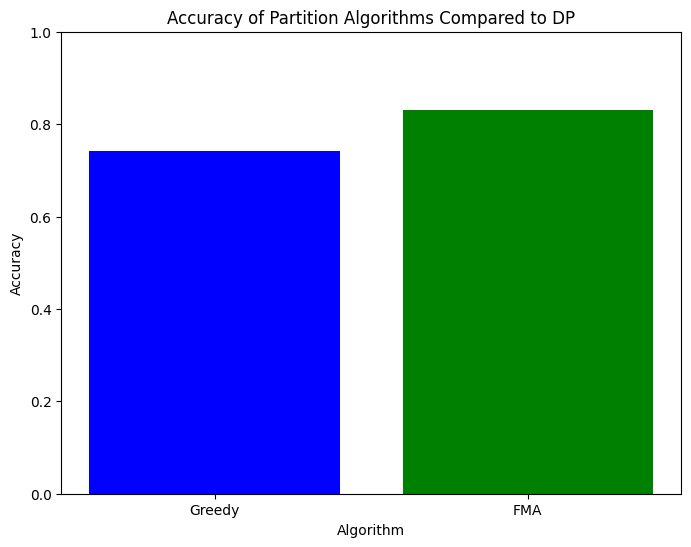

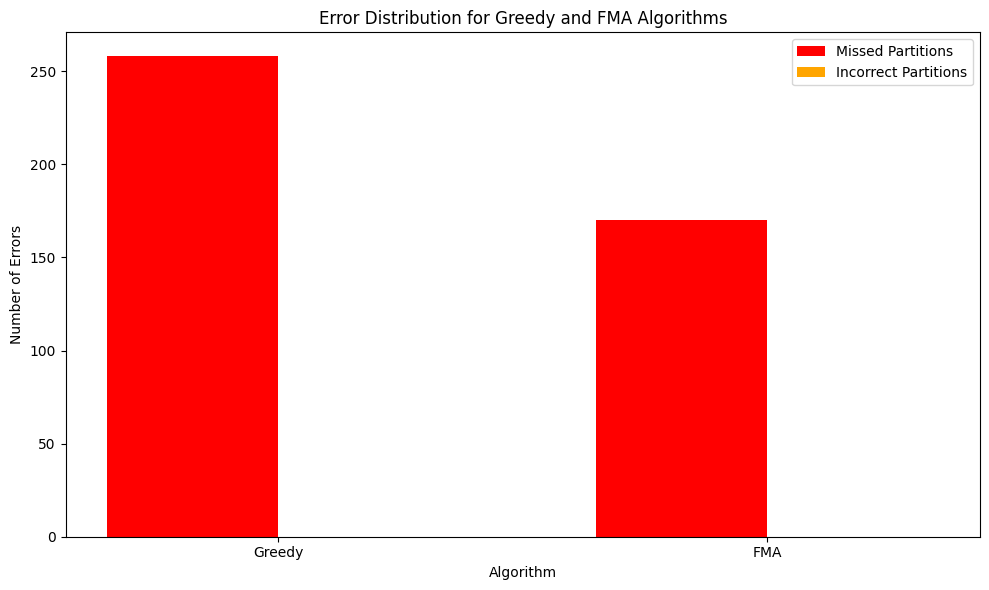

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

total_tests = len(test_cases)
greedy_accuracy = (total_tests - greedy_false_error - greedy_true_error) / total_tests
fma_accuracy = (total_tests - fma_false_error - fma_true_error) / total_tests

# Plotting Accuracy Graph
plt.figure(figsize=(8, 6))
plt.bar(['Greedy', 'FMA'], [greedy_accuracy, fma_accuracy], color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Partition Algorithms Compared to DP')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


# Plotting Error Distribution Graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)

bar1 = plt.bar(index, [greedy_false_error, fma_false_error], bar_width, label='Missed Partitions', color='red')
bar2 = plt.bar(index + bar_width, [greedy_true_error, fma_true_error], bar_width, label='Incorrect Partitions', color='orange')

plt.xlabel('Algorithm')
plt.ylabel('Number of Errors')
plt.title('Error Distribution for Greedy and FMA Algorithms')
plt.xticks(index + bar_width / 2, ['Greedy', 'FMA'])
plt.legend()

plt.tight_layout()
plt.show()


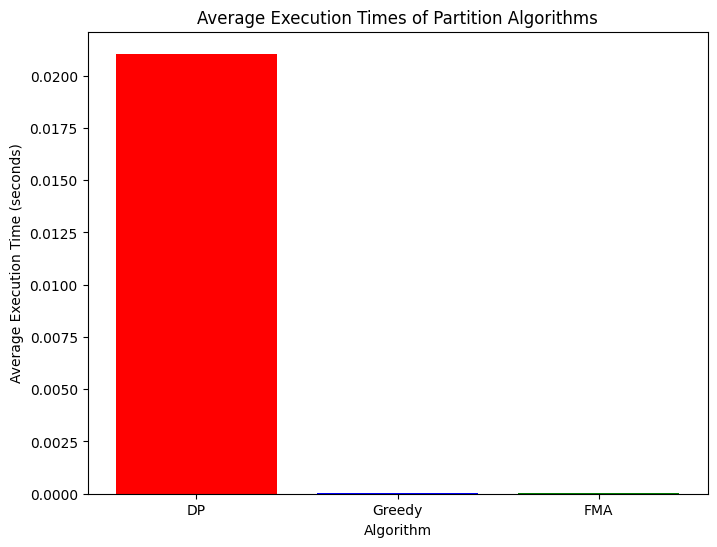

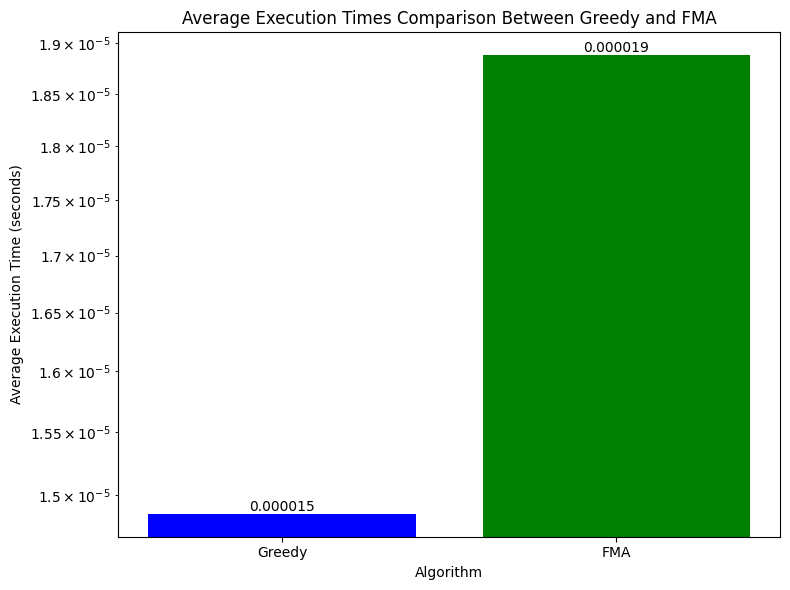

In [ ]:
average_times = [dp_time / len(test_cases), greedy_time / len(test_cases), fma_time / len(test_cases)]

plt.figure(figsize=(8, 6))
plt.bar(['DP', 'Greedy', 'FMA'], average_times, color=['red', 'blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Execution Times of Partition Algorithms')
plt.show()

# Assuming greedy_time and fma_time hold the cumulative execution times for Greedy and FMA algorithms
average_greedy_time = greedy_time / len(test_cases)
average_fma_time = fma_time / len(test_cases)

# Set up the bar chart
plt.figure(figsize=(8, 6))
bar_locations = [0, 1]
bar_heights = [average_greedy_time, average_fma_time]
bar_labels = ['Greedy', 'FMA']
bar_colors = ['blue', 'green']

plt.bar(bar_locations, bar_heights, tick_label=bar_labels, color=bar_colors)
plt.xlabel('Algorithm')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Execution Times Comparison Between Greedy and FMA')
plt.yscale('log')  # Optional: Log scale can help visualize small differences

# Display the values on top of the bars
for i, time_taken in enumerate(bar_heights):
    plt.text(i, time_taken, f'{time_taken:.6f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# In batches

In [ ]:
def generate_test_case_batches(min_cases, max_cases, step, min_length=1, max_length=100, min_value=1, max_value=100):
    """
    Generate multiple batches of test cases for the partition problem, with increasing sizes.

    :param min_cases: Minimum number of test cases in a batch
    :param max_cases: Maximum number of test cases in a batch
    :param step: Increment of test cases per batch
    :param min_length: Minimum length of each test case
    :param max_length: Maximum length of each test case
    :param min_value: Minimum value of elements in a test case
    :param max_value: Maximum value of elements in a test case
    :return: Dictionary with keys as number of cases and values as list of test cases
    """
    batches = {}
    for num_cases in range(min_cases, max_cases + 1, step):
        batches[num_cases] = generate_test_cases(num_cases, min_length, max_length, min_value, max_value)
    return batches

def measure_average_runtime(func, batches):
    """
    Measure the average runtime for each batch of test cases for a given algorithm.

    :param func: The algorithm function to test
    :param batches: The batches of test cases
    :return: A list of average runtimes
    """
    average_runtimes = {}
    for num_cases, test_cases in batches.items():
        total_time = 0
        for test in test_cases:
            result = measure_time(func, test)
            total_time += result['time']
        average_runtimes[num_cases] = total_time / num_cases
    return average_runtimes

# Generate test case batches
min_cases, max_cases, step = 10, 1000, 50
batches = generate_test_case_batches(min_cases, max_cases, step)

# Measure average runtime for each batch
greedy_runtimes = measure_average_runtime(greedy_partition, batches)
fma_runtimes = measure_average_runtime(fma_partition, batches)

# Data visualization

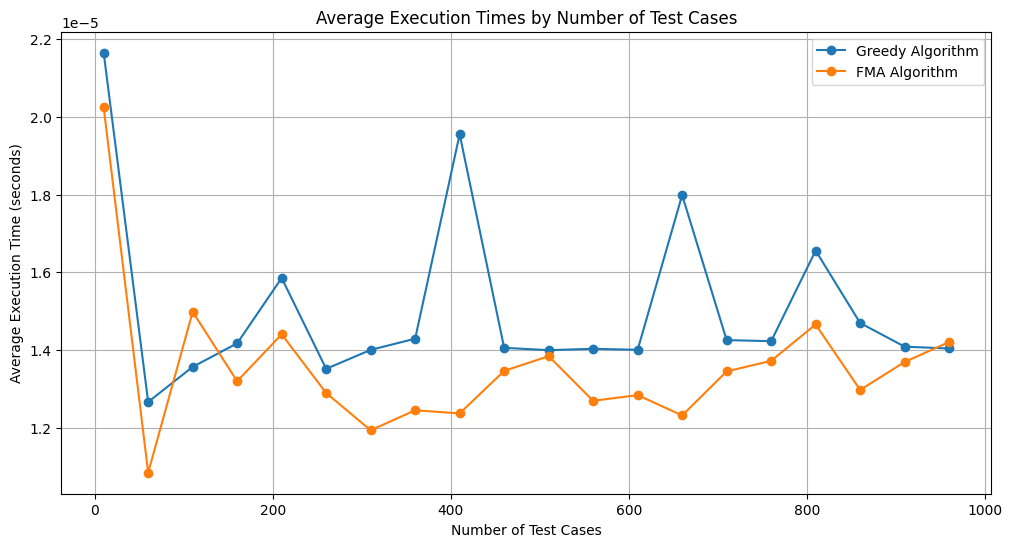

In [ ]:
plt.figure(figsize=(12, 6))

# Greedy algorithm runtimes
plt.plot(greedy_runtimes.keys(), greedy_runtimes.values(), marker='o', label='Greedy Algorithm')

# FMA algorithm runtimes
plt.plot(fma_runtimes.keys(), fma_runtimes.values(), marker='o', label='FMA Algorithm')

plt.xlabel('Number of Test Cases')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Execution Times by Number of Test Cases')
plt.legend()
plt.grid(True)
plt.show()